Generating Sankey diagrams visualizing the paths people take when trying to spell a particular word.

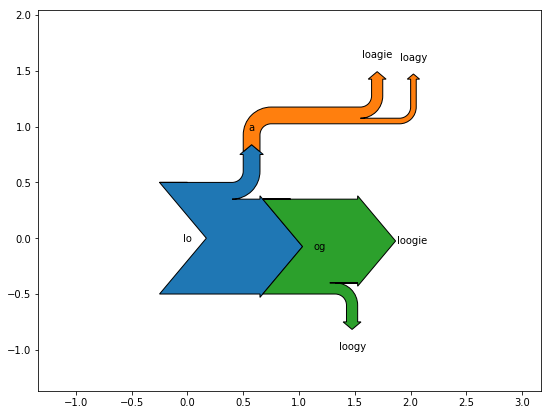

In [6]:
# Proof of concept. Spellings of 'loogie' (made-up numbers)
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey


fig, ax = plt.subplots(1, figsize=(9,7))
forms = {
    'loogie': 75,
    'loogy': 10,
    'loagie': 10,
    'loagy': 5,
}

flows_and_orients_labels = [
    (100, 0, ''),  # input -> lo
    (-15, 1, 'a'), # lo -> loa
    (-85, 0, 'og'), # lo -> loog
]

flows, orients, labels = zip(*flows_and_orients_labels)
    
sankey = Sankey(scale=1/100.0,
                ax=ax,
    unit=None, # Don't show quantities
    )
sankey.add(flows=flows,
    labels=labels,
    orientations=orients,
    patchlabel='lo',
)

sankey.add(
    flows=[15, -10, -5],
    labels=['', 'loagie', 'loagy'],
    prior=0,
    connect=(1, 0),
    # XXX: why does passing None or 0 not work?
    orientations=[-1, 1, 1],
)

sankey.add(
    flows=[85, -10, -75],
    labels=['', 'loogy', 'loogie'],
    prior=0,
    connect=(2, 0),
    orientations=[0, -1, 0],
)

sankey.finish();

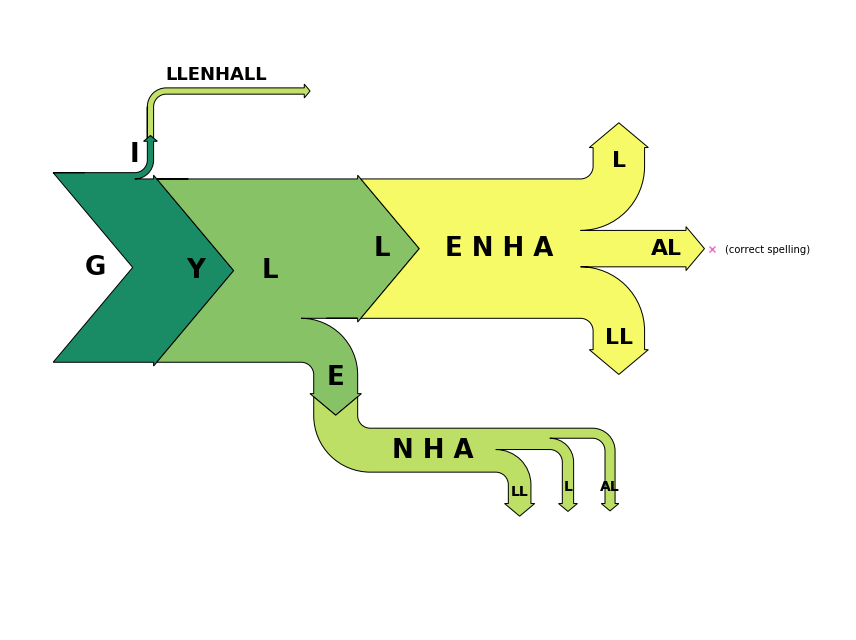

In [275]:
import matplotlib as mpl
import matplotlib.cm
import numpy as np

[('gillenhall', 5),
 ('gylenhaal', 8),
 ('gylenhal', 9),
 ('gylenhall', 18),
 ('gyllenhaal', 29),
 ('gyllenhal', 41),
 ('gyllenhall', 41)]
d = {'G': {
    'i': {'llenhall': 5},
    'yl' : {
        'enha': {
            'al': 8,
            'l': 9,
            'll': 18,
        },
        'lenha': {
            'al': 29,
            'l': 41,
            'll': 41,
        }
    }
}
}

fig, ax = plt.subplots(1, figsize=(12,9))
ax.axis('off')
sankey = Sankey(
    scale=0.01,
                ax=ax,
                gap=0.25,
                #radius=0.25,
    unit=None, # Don't show quantities
    offset=0.3,
)

GIL = d['G']['i']['llenhall']
gyle = d['G']['yl']['enha']
GYLE = sum(gyle.values())
gyll = d['G']['yl']['lenha']
GYLL = sum(gyll.values())
GYL = GYLE + GYLL
tot = GIL + GYL

cmap = matplotlib.cm.get_cmap('summer')
cols = cmap(np.linspace(.1, .96, 5))

# G -> {i, yl}
sankey.add(
    flows=[tot, -GIL, -tot+GIL],
    labels=['G', '', ''],
    orientations=[0, 1, 0],
    facecolor=cols[0],
)

# Gil -> lenhall
sankey.add(
    flows=[GIL, -GIL],
    labels=['I', 'Gillenhall'],
    orientations=[0, -1],
    prior=0,
    connect=(1, 0),
    facecolor=cmap(.76),
    trunklength=.6,
    pathlengths=[.0, 1.2],
)

# Gyl -> {l, e}
remainder = tot - GIL # = GYL
sankey.add(
    flows=[remainder, -GYLE, -GYLL],
    labels=['Y', '', ''],
    orientations=[0, -1, 0],
    trunklength=1.5,
    prior=0,
    connect=(2, 0),
    patchlabel='L',
    facecolor=cols[2],
)

# Gyle...
suffs = ['al', 'l', 'll']
flows = [GYLE] + [-1*gyle[s] for s in suffs]
labels = ['E'] + [('Gylenha' + s) for s in suffs]
fwd = 1
if fwd:
    ors = [1, -1, -1, -1] # ,0
else:
    ors = [0, -1, 0, 1]
sankey.add(
    flows=flows,
    labels=labels,
    orientations=ors,
    prior=2,
    connect=(1, 0),
    patchlabel='N H A',
    facecolor=cols[3],
    trunklength=1.2,
)

terms = 1
if terms:
    # Label placement hack
    for i, suff in enumerate(suffs):
        f = -1 * flows[i+1]
        sankey.add(
            flows=[f, -f],
            labels=[suff.upper(), ''],
            orientations=[1, 1],
            prior=3,
            connect=(i+1, 0),
            alpha=0,
        )


# Gyll..
suffs = ['al', 'l', 'll']
flows = [GYLL] + [-1*gyll[s] for s in suffs]
labels = ['L'] + [('Gyllenha' + s) for s in suffs]
sankey.add(
    flows=flows,
    labels=labels,
    orientations=[0, 0, 1, -1],
    prior=2,
    connect=(2, 0),
    patchlabel='E N H A',
    #trunklength=1.5,
    pathlengths=[1.1, .33, .25, .25],
    facecolor=cols[4],
)


if terms:
    # Label placement hack
    for i, suff in enumerate(suffs):
        f = -1 * flows[i+1]
        sankey.add(
            flows=[f, -f],
            labels=[suff.upper(), ''],
            orientations=[1, 1],
            prior=4+3,
            connect=(i+1, 0),
            alpha=0,
        )

diags = sankey.finish();
fprops = mpl.font_manager.FontProperties(
    size=26,
    weight='bold',
    #stretch='ultra-expanded',
)

#t = diags[0].texts[0]
for diag in diags:
    for t in diag.texts:
        txt = t.get_text()
        if len(txt) <= 6:
            t.set_font_properties(fprops)
        else:
            t.set_text('') # XXX
            pass
    diag.text.set_font_properties(fprops)
    
diags[2].text.set_x(1.48)
diags[4+(3*terms)].text.set_x(3.3)
diags[1].texts[0].set_x(.4)
diags[1].texts[0].set_y(.9)

for diag in diags[5+3:] + diags[4:7]:
    for t in diag.texts:
        t.set_fontsize(22)
        
for diag in diags[4:7]:
    for t in diag.texts:
        x, y = t.get_position()
        t.set_y(y-.1)
        t.set_fontsize(14)

t = ax.text(.64, 1.5,
            'LLENHALL',
            fontsize=18,
            fontweight='bold',
           )

if 1:
    ax.annotate('(correct spelling)',
                xy=(5.0, .15), xycoords='data',
                xytext=(5.1, .12),
                #arrowprops=dict(arrowstyle="->"),
               )
ax.scatter(5.0, .15, marker='x');
fig.set_facecolor('white')
fig.tight_layout();

In [46]:
# Real dat
g = {'gylenhal': 9, 'gyllenhall': 41, 'gylenhaal': 8, 'gylenhall': 18, 'gyllenhaal': 29, 'gyllenhal': 41, 
     'gillenhall': 5}
its = list(g.items())
sorted(its, key=lambda tup:tup[0])

[('gillenhall', 5),
 ('gylenhaal', 8),
 ('gylenhal', 9),
 ('gylenhall', 18),
 ('gyllenhaal', 29),
 ('gyllenhal', 41),
 ('gyllenhall', 41)]

In [ ]:

c = {'comeraderie': 8, 'camaraderie': 6, 'comaraderie': 5, 'comraderie': 24, 'comradery': 54, 
     'cameraderie': 7, 'comradere': 8}